<a href="https://colab.research.google.com/github/shoumyasingh/Artificial_Intelligence_python/blob/main/Al_hw2_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create hypothesis function/loss function/cost function for binary classification and train your module by python program based on gradient descent algorithm from the following breast cancer dataset. After that, predict which class of last two records (highlighted in red color) is 
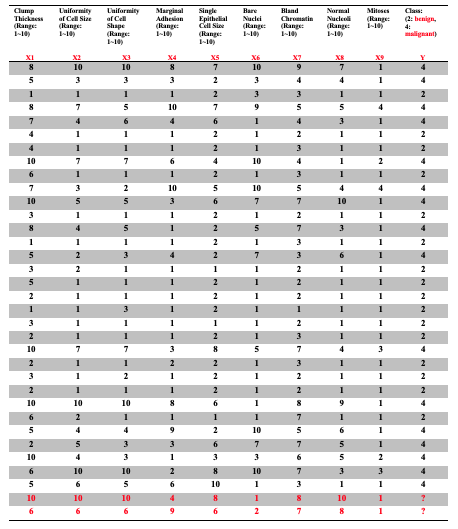


Theta  0  =  0.24477925437029793
Theta  1  =  1.3058900393171191
Theta  2  =  0.30664787344440037
Theta  3  =  0.772721596581664
Theta  4  =  0.27217267661882594
Theta  5  =  0.875916560790863
Theta  6  =  0.4474696769602409
Theta  7  =  1.2765495561252336
Theta  8  =  0.2582081722530459



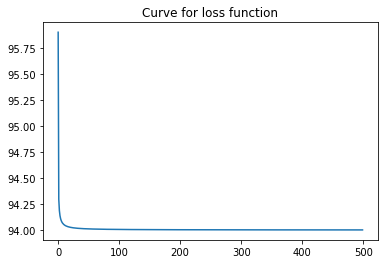

First predition:  Class 4
Second predition:  Class 4


In [46]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np


data = pd.DataFrame()

data['X1']=[8,5,1,8,7,4,4,10,6,7,10,3,8,1,5,3,5,2,1,3,2,10,2,3,2,10,6,5,2,10,6,5]
data['X2']=[10,3,1,7,4,1,1,7,1,3,5,1,4,1,2,2,1,1,1,1,1,7,1,1,1,10,2,4,5,4,10,6]
data['X3']=[10,3,1,5,6,1,1,7,1,2,5,1,5,1,3,1,1,1,3,1,1,7,1,2,1,10,1,4,3,3,10,5]
data['X4']=[8,3,1,10,4,1,1,6,1,10,3,1,1,1,4,1,1,1,1,1,1,3,2,1,1,8,1,9,3,1,2,6]
data['X5']=[7,2,2,7,6,2,2,4,2,5,6,2,2,2,2,1,2,2,2,1,2,8,2,2,2,6,1,2,6,3,8,10]
data['X6']=[10,3,3,9,1,1,1,10,1,10,7,1,5,1,7,1,1,1,1,1,1,5,1,1,1,1,1,10,7,3,10,1]
data['X7']=[9,4,3,5,4,2,3,4,3,5,7,2,7,3,3,2,2,2,1,2,3,7,3,2,2,8,7,5,7,6,7,3]
data['X8']=[7,4,1,5,3,1,1,1,1,4,10,1,3,1,6,1,1,1,1,1,1,4,1,1,1,9,1,6,5,5,3,1]
data['X9']=[1,1,1,4,1,1,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,2,3,1]
data['y']=[4,4,2,4,4,2,2,4,2,4,4,2,4,2,4,2,2,2,2,2,2,4,2,2,2,4,2,4,4,4,4,4]
#data['y']=[1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,1]

#print(data)
#sns.pairplot(data, hue='y')

from sklearn.model_selection import train_test_split
# 80% train
train, test= train_test_split(data.values, test_size=0.2)

from math import exp
# for general cases of n features (linear z)
def predict(row, theta):
  x = row [0:9]
  #hypothesis function
  yhat = theta[0]
  for i, xi in enumerate(x):
    yhat += theta[i+1]*xi
  return 1.0 / (1.0 + exp(-yhat))

l_rate = 0.1
n_iter = 500
nd = 9

#loss function
loss = np.zeros(n_iter)
theta = [0.0]*(nd+1)
for iter in range(n_iter):
  sum_error = 0
  for row in train:
    x = row[0:-1]
    y = row[-1] #last column in matrix
    yhat = predict(row, theta)
    error = y-yhat
    sum_error += error*2
    theta[0] += l_rate*error*yhat*(1-yhat)
    for i in range (nd):
      theta[i+1] += l_rate*error*yhat*(1-yhat)*(x[i]**2)
  loss[iter] = sum_error

print()
for i in range(nd):
  print("Theta ", i, " = ", theta[i] )
print()

plt.plot(loss)
plt.title('Curve for loss function')
plt.show()

def test(x, theta):
  yhat = theta[0]
  for i in range (len(x)-1):
     yhat += theta[i+1]*(x[i]**2)
  return yhat
x_p1=[10,10,10,4,8,1,8, 10, 1]
x_p2=[6,6,6,9,6,2,7,8,1]

print("First predition: ","Class 4" if test(x_p1, theta)>0 else "Class 2")
print("Second predition: ","Class 4" if test(x_p2, theta)>0 else "Class 2")